## **Build Fashion image recognition**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


source: https://medium.com/nanonets/how-to-classify-fashion-images-easily-using-convnets-81e1e0019ffe

### Fashion dataset
https://github.com/zalandoresearch/fashion-mnist

In [ ]:
fashionmnist = tf.keras.datasets.fashion_mnist

#### tf.keras.datasets
https://keras.io/api/datasets/ <br>
https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [ ]:
(training_images, training_labels), (test_images, test_labels) = fashionmnist.load_data()

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

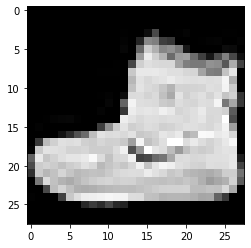

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_images[0], cmap="gray")
print(training_labels[0])
print(training_images[0])

### Normalizing the values in to range between 0 to 1
You will see that the values in the image are between 0 to 255. But a neural network works better with normalized data (between 0 and 1)

In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
training_images.shape, training_labels.shape

((60000, 28, 28), (60000,))

### Dense Neural Network

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

![](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png)

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#### **[Multi-label vs. Multi-class Classification](https://glassboxmedicine.com/2019/05/26/classification-sigmoid-vs-softmax/)**
We convert a classifier’s raw output values into probabilities using either a sigmoid function or a softmax function.
#### **Multi-Label Classification** Problem = More than one right answer
When we’re building  a classifier for a problem with more than one right answer, we apply a **sigmoid** function to each element of the raw output independently.
$$\sigma(z_j)=\frac{e^{z_j}}{1+e^{z_j}}$$
![](https://glassboxmedicine.files.wordpress.com/2019/05/sigmoidvssoftmax2-1.png?w=768)
#### **Multi-Class Classification** Problem = Only one right answer
- When we’re building a classifier for problems with only one right answer, we apply a **softmax** to the raw outputs.
- the different probabilities produced by the softmax function are interrelated.
$$\text{softmax}(z_j)=\frac{e^{z_j}}{\sum^K_{k=1}e^{z_k}}; \text{for }j=1,...,K$$
![](https://glassboxmedicine.files.wordpress.com/2019/05/sigmoidvssoftmax3.png?w=768)

#### Testing softmax function

In [ ]:
import numpy as np

def softmax(z):
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z, axis=0)
    return exp_z / sum_exp_z

z = [1., 2., 3.]
print("Before apply softmax function:", z)

softmax_z = softmax(z)
print("After apply softmax function:", softmax_z)

print("Sum of softmax:", softmax_z.sum())

Before apply softmax function: [1.0, 2.0, 3.0]
After apply softmax function: [0.09003057 0.24472847 0.66524096]
Sum of softmax: 1.0


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Available losses in Keras API
https://keras.io/api/losses/ <br>
**Sparse Categorical Crossentropy** - Computes the crossentropy loss between the labels and predictions.
$$\text{Loss} = -\sum^C_{c=1}y_i\log(\hat{y_i})$$
$C$ is the total classes.

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4984 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3742 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8791
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8843
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2915 - accuracy: 0.8924


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8711


[0.3630017340183258, 0.8711000084877014]

### Convolutional Neural Network (CNN)

#### **Convolution**
![](https://miro.medium.com/max/1920/1*D6iRfzDkz-sEzyjYoVZ73w.gif)
![](https://sgugger.github.io/images/art4_one_conv.png)
[Try with different kernels](https://setosa.io/ev/image-kernels/)

Convolution layer ([Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)) <br>
More information about Convolutional Neural Network [link](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF)

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D
from tensorflow.keras.models import Sequential

In [ ]:
training_images = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

#### 1 Conv CNN

In [ ]:
conv_model = Sequential()
conv_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=training_images.shape[1:]))
conv_model.add(Flatten())
conv_model.add(Dense(128, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

conv_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
conv_model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3819 - accuracy: 0.8637
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2537 - accuracy: 0.9064
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1999 - accuracy: 0.9252
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1599 - accuracy: 0.9406
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1257 - accuracy: 0.9538


In [ ]:
score2 = conv_model.evaluate(test_images, test_labels)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3033 - accuracy: 0.9083
Test loss: 0.30334171652793884
Test accuracy: 0.90829998254776


In [ ]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


#### One-Hot encoding in label

In [ ]:
from tensorflow.keras.utils import to_categorical

# one hot encode target values
trainY = to_categorical(training_labels)
testY = to_categorical(test_labels)

#### One-Hot encoding
![](https://static.packt-cdn.com/products/9781838556334/graphics/C12624_06_04.jpg)
https://www.youtube.com/watch?v=BecEHOVmx9o

In [ ]:
print("Before encoding:\n", training_labels[:3])
print("After encoding:\n", trainY[:3])

Before encoding:
 [9 0 0]
After encoding:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from tensorflow.keras.layers import MaxPooling2D

Max pooling layer ([MaxPooling2d](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) <br>
![](https://austingwalters.com/wp-content/uploads/2019/01/max-pooling.png)

In [ ]:
    # Add convolution 2D
cnn_one_hot = Sequential()
cnn_one_hot.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_one_hot.add(MaxPooling2D((2, 2)))
cnn_one_hot.add(Flatten())
cnn_one_hot.add(Dense(100, activation='relu'))
cnn_one_hot.add(Dense(10, activation='softmax'))

cnn_one_hot.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

If your targets are one-hot encoded, use "categorical_crossentropy". But if your targets are integers, use "sparse_categorical_crossentropy".

In [ ]:
cnn_one_hot.fit(training_images, trainY, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4064 - accuracy: 0.8575
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2740 - accuracy: 0.9003
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2291 - accuracy: 0.9164
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1968 - accuracy: 0.9272
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1699 - accuracy: 0.9374


In [ ]:
score3 = cnn_one_hot.evaluate(test_images, testY, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.24243171513080597
Test accuracy: 0.9151999950408936


In [ ]:
cnn_one_hot.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


#### 3 Conv CNN

![](https://drive.google.com/uc?export=view&id=10jDCwmNndYfM2s7gVQt4MeTpKt6zr-mt)

In [ ]:
# Add convolution 2D
cnn3conv = Sequential()
cnn3conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=training_images.shape[1:]))
cnn3conv.add(MaxPooling2D((2, 2)))
cnn3conv.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3conv.add(MaxPooling2D(pool_size=(2, 2)))
cnn3conv.add(Conv2D(128, (3, 3), activation='relu'))
cnn3conv.add(Flatten())
cnn3conv.add(Dense(128, activation='relu'))
cnn3conv.add(Dense(10, activation='softmax'))

cnn3conv.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
cnn3conv.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4690 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3004 - accuracy: 0.8893
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2533 - accuracy: 0.9051
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2227 - accuracy: 0.9183
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1978 - accuracy: 0.9267


In [ ]:
score4 = cnn3conv.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.2658214867115021
Test accuracy: 0.9063000082969666


In [ ]:
cnn3conv.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

## **Transfer Learning**
Instead of training from zero, why not train from existing model (knowledge).

In [ ]:
# example of using a pre-trained model as a classifier
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [ ]:
from io import BytesIO
from urllib import request
from PIL import Image

# load an image from file
image_url =  'https://bloximages.newyork1.vip.townnews.com/gazette.com/content/tncms/assets/v3/editorial/e/7f/e7ff6af0-929e-11e9-bb60-3fb6efa3366b/5d0a479b8c78c.image.jpg?crop=1247%2C1247%2C207%2C0&resize=1247%2C1247&order=crop%2Cresize' #@param {type:"string"}
res = request.urlopen(image_url).read()
image = Image.open(BytesIO(res)).resize((224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image.shape

(1, 224, 224, 3)

In [ ]:
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()

#### **VGG16 Network architecture**
VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)”. The model achieves 92.7% top-5 test accuracy in [ImageNet](http://www.image-net.org/), which is a dataset of over 14 million images belonging to 1000 classes.
![](https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png)
#### 1,000 ImageNet dataset classes https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
#### More models: https://keras.io/api/applications/

In [ ]:
# predict the probability across all output classes
yhat = model.predict(image)

In [ ]:
# convert the probabilities to class labels
label = decode_predictions(yhat) # https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     